predicted=132.534689, expected=2.000000
predicted=90.290372, expected=6.000000
predicted=3.547737, expected=3.000000
predicted=3.611707, expected=16.000000
predicted=10.640705, expected=3.000000
Test MSE: 4871.264


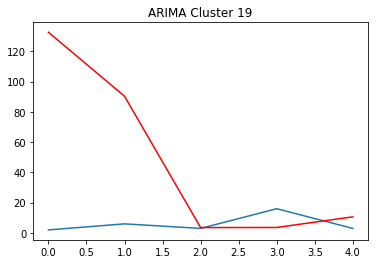

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import datetime
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

series = pd.read_csv('cluster_19_Arima.csv', usecols=['Tahun','count'],header=0, parse_dates=[0], index_col=0, squeeze=True)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.title("ARIMA Cluster 19")
plt.plot(test)
plt.plot(predictions, color='red')
plt.savefig("plot prediction/plot arima 19.png")